In [3]:
from google.colab import files
upload = files.upload()

Saving images_faces.zip to images_faces.zip


In [6]:
#  %cd ../
#  %mv dataset4.csv sample_data/
#  %cd sample_data/
%mkdir train
%mkdir test
%mkdir train/male
%mkdir train/female
%mkdir test/male
%mkdir test/female
!unzip images_faces.zip

Streaming output truncated to the last 5000 lines.
   creating: lfw/Bart_Hendricks/
  inflating: lfw/Bart_Hendricks/Bart_Hendricks_0001.jpg  
 extracting: lfw/Bart_Hendricks/3.0Bart_Hendricks_0001.jpg  
  inflating: lfw/Bart_Hendricks/2.0Bart_Hendricks_0001.jpg  
   creating: lfw/Jeffrey_Katzenberg/
  inflating: lfw/Jeffrey_Katzenberg/Jeffrey_Katzenberg_0001.jpg  
  inflating: lfw/Jeffrey_Katzenberg/2.0Jeffrey_Katzenberg_0001.jpg  
 extracting: lfw/Jeffrey_Katzenberg/3.0Jeffrey_Katzenberg_0001.jpg  
   creating: lfw/Ricky_Ray/
  inflating: lfw/Ricky_Ray/Ricky_Ray_0001.jpg  
  inflating: lfw/Ricky_Ray/2.0Ricky_Ray_0001.jpg  
 extracting: lfw/Ricky_Ray/3.0Ricky_Ray_0001.jpg  
   creating: lfw/Sherry_Irving/
  inflating: lfw/Sherry_Irving/Sherry_Irving_0001.jpg  
  inflating: lfw/Sherry_Irving/3.0Sherry_Irving_0001.jpg  
  inflating: lfw/Sherry_Irving/2.0Sherry_Irving_0001.jpg  
   creating: lfw/Derrick_Taylor/
  inflating: lfw/Derrick_Taylor/Derrick_Taylor_0001.jpg  
  inflating: lfw/Der

In [39]:
# %cd sample_data/
%ls

dataset1.csv  dataset3.csv  home              lfw/          test/
dataset2.csv  dataset4.csv  images_faces.zip  sample_data/  train/


In [0]:
import torch
import numpy as np
import pandas as pd

# Модуль с блоками и функциями нейронных сетей
from torch import nn

# Модуль с оптимизаторами
from torch import optim

from torch.utils.data import DataLoader, Dataset

# Модуль с датасетами и моделями для компютерного зрения
import torchvision
from torchvision import transforms

import matplotlib.pyplot as plt

from IPython.display import clear_output
from PIL import Image
from tqdm.autonotebook import tqdm

In [0]:
transform = transforms.Compose([       
    transforms.RandomRotation(20),                      
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [0]:
import os
names = os.listdir('lfw')
names1 = names[:1500]
names2 = names[1500:3000]
names3 = names[3000:4500]
names4 = names[4500:5200]
testnames = names[5200:]
data1 = pd.read_csv('dataset1.csv').drop(['Unnamed: 0'],axis=1)
data2 = pd.read_csv('dataset2.csv').drop(['Unnamed: 0'],axis=1) 
data3 = pd.read_csv('dataset3.csv').drop(['Unnamed: 0'],axis=1)
data4 = pd.read_csv('dataset4.csv').drop(['Unnamed: 0'],axis=1) 

In [0]:
data = pd.concat([data1,data2,data3,data4],axis=0)

In [0]:
data

,Image,gender
0,3.0Denise_van_Outen_0001.jpg,female
1,Denise_van_Outen_0001.jpg,female
2,2.0Denise_van_Outen_0001.jpg,female
3,Kevin_Gil_0001.jpg,male
4,3.0Kevin_Gil_0001.jpg,male
...,...,...
10522,2.0Ibrahim_Jaafari_0001.jpg,male
10523,3.0Ibrahim_Jaafari_0001.jpg,male
10524,Ibrahim_Jaafari_0002.jpg,male
10525,Ibrahim_Jaafari_0001.jpg,male


In [12]:
for name in tqdm(names1):
    for pic in os.listdir('lfw/'+name):
        if '3.0' in pic:
            pass
        else:
            try:
                gender = data[data.Image == pic]
                if gender.values[0][1] == 'male':
                   os.rename('lfw/{}/{}'.format(name,pic), 'train/male/{}'.format(pic))
                else:
                    os.rename('lfw/{}/{}'.format(name,pic), 'train/female/{}'.format(pic))
            except:
                pass

In [13]:
for name in tqdm(names2):
    for pic in os.listdir('lfw/'+name):
        if '3.0' in pic:
            pass
        else:
            try:
                gender = data[data.Image == pic]
                if gender.values[0][1] == 'male':
                   os.rename('lfw/{}/{}'.format(name,pic), 'train/male/{}'.format(pic))
                else:
                    os.rename('lfw/{}/{}'.format(name,pic), 'train/female/{}'.format(pic))
            except:
                pass

In [14]:
for name in tqdm(names3):
    for pic in os.listdir('lfw/'+name):
        if '3.0' in pic:
            pass
        else:
            try:
                gender = data[data.Image == pic]
                if gender.values[0][1] == 'male':
                   os.rename('lfw/{}/{}'.format(name,pic), 'train/male/{}'.format(pic))
                else:
                    os.rename('lfw/{}/{}'.format(name,pic), 'train/female/{}'.format(pic))
            except:
                pass

In [15]:
for name in tqdm(names4):
    for pic in os.listdir('lfw/'+name):
        if '3.0' in pic:
            pass
        else:
            try:
                gender = data[data.Image == pic]
                if gender.values[0][1] == 'male':
                   os.rename('lfw/{}/{}'.format(name,pic), 'train/male/{}'.format(pic))
                else:
                    os.rename('lfw/{}/{}'.format(name,pic), 'train/female/{}'.format(pic))
            except:
                pass

In [16]:
for name in tqdm(testnames):
    for pic in os.listdir('lfw/'+name):
        if '3.0' in pic:
            pass
        else:
            try:
                gender = data[data.Image == pic]
                if gender.values[0][1] == 'male':
                   os.rename('lfw/{}/{}'.format(name,pic), 'test/male/{}'.format(pic))
                else:
                    os.rename('lfw/{}/{}'.format(name,pic), 'test/female/{}'.format(pic))
            except:
                pass

In [33]:
print(len(os.listdir('train/female')))
print(len(os.listdir('train/male')))

5916
5916


In [0]:
males = os.listdir('train/male')
for i in range(18527-5916):
    os.remove('train/male/'+males[i])

In [0]:
males = os.listdir('test/male')
for i in range(2049-595):
    os.remove('test/male/'+males[i])

In [0]:
TRAIN_DATA_PATH = 'train'
TEST_DATA_PATH = 'test'
BATCH_SIZE = 64
train_data = torchvision.datasets.ImageFolder(root=TRAIN_DATA_PATH, transform=transform)
train_data_loader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True,  num_workers=4)
test_data = torchvision.datasets.ImageFolder(root=TEST_DATA_PATH, transform=transform)
test_data_loader  = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=4) 

In [22]:
from torchvision import models
resnet = models.resnet50(True)
# resnet2 = models.resnet34(True)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [0]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [0]:
for param in resnet.parameters():
  param.requires_grad = False

In [34]:
resnet.fc = nn.Linear(2048, 2)
resnet.fc.requires_grad_(True)
resnet.layer4.requires_grad_(True)

Sequential(
  (0): Bottleneck(
    (conv1): Conv2d(1024, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(512, 2048, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn3): BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (downsample): Sequential(
      (0): Conv2d(1024, 2048, kernel_size=(1, 1), stride=(2, 2), bias=False)
      (1): BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): Bottleneck(
    (conv1): Conv2d(2048, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): 

In [0]:
opt = optim.Adam(resnet.parameters())

In [36]:
print(len(train_data_loader))
print(len(test_data_loader))

185
17


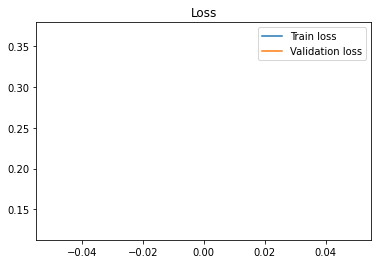

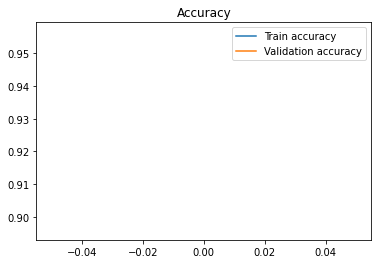

0 | Train loss: 0.12502261320682798 | Train accuracy: 0.9564792471963006 | Val loss: 0.3668324798345566 | Val accuracy: 0.8960084038622239


KeyboardInterrupt: ignored

In [35]:
model = resnet
epoch_num = 10
#opt = cnn_opt

# Массивы для метрик

train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
loss_func = nn.CrossEntropyLoss()


# Основной цикл по эпохам
for epoch in range(epoch_num):

  # Массивы для промежуточных метрик 
  losses = []
  accuracies = []
  
  model.train()
  # Цикл обучения
  for i, (X, y) in tqdm(enumerate(train_data_loader)):

    # Обучение модели
    pred = model(X)
    loss = loss_func(pred, y)
    opt.zero_grad()
    loss.backward()
    opt.step()
    losses.append(loss.item())
    acc = (pred.argmax(-1) == y).float().mean()
    accuracies.append(acc.item())

  train_losses.append(np.mean(losses))
  train_accuracies.append(np.mean(accuracies))
  losses = []
  accuracies = []

  # Validation
  model.eval()
  with torch.no_grad():
    for j, (X_test, y_test) in tqdm(enumerate(test_data_loader)):


      pred = model(X_test)
      loss = loss_func(pred, y_test)
      losses.append(loss.item())
      acc = (pred.argmax(-1) == y_test).float().mean()
      accuracies.append(acc.item())

  test_losses.append(np.mean(losses))
  test_accuracies.append(np.mean(accuracies))

  # Очищаем то что нарисовано
  clear_output(True)
  # Создаём новый график
  plt.figure()
  # Рисуем лосс
  steps = range(len(train_losses))

  plt.plot(steps, train_losses, label='Train loss')
  plt.plot(steps, test_losses, label='Validation loss')

  plt.legend()
  plt.title("Loss")
  # Создаём новый график
  plt.figure()
  # Рисуем accuracy
  plt.plot(steps, train_accuracies, label='Train accuracy')
  plt.plot(steps, test_accuracies, label='Validation accuracy')

  plt.legend()
  plt.title("Accuracy")

  # Показываем в тетрадке
  plt.show()

  print(epoch, "|", "Train loss:", train_losses[-1], "|", "Train accuracy:", train_accuracies[-1], "|", "Val loss:", test_losses[-1], "|", "Val accuracy:", test_accuracies[-1])

In [0]:
torch.save(resnet.state_dict(),'home')

In [0]:
from google.colab import files
files.download('home')